In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [16, 8]
matplotlib.rcParams.update({'font.size': 30})
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in the data 
Fdf = pd.read_csv("familyData.csv")
Fdf = Fdf.iloc[:,1:] 
print(Fdf.columns)

Index(['year', 'composition', 'headCount', 'ageHead', 'liquidWealth',
       'laborIncome', 'costPerPerson', 'totalExpense', 'participation',
       'investmentAmount', 'annuityIRA', 'wealthWithoutHomeEquity',
       'wealthWithHomeEquity', 'HomeEquity', 'maritalStatus',
       'employmentStatus', 'education', 'race', 'industry', 'ownership',
       'skillLevel', 'financeExperience', 'ageGroup', 'decadeGroup',
       'stockInvestmentRatio'],
      dtype='object')


### Summary Plots 

<BarContainer object of 3 artists>

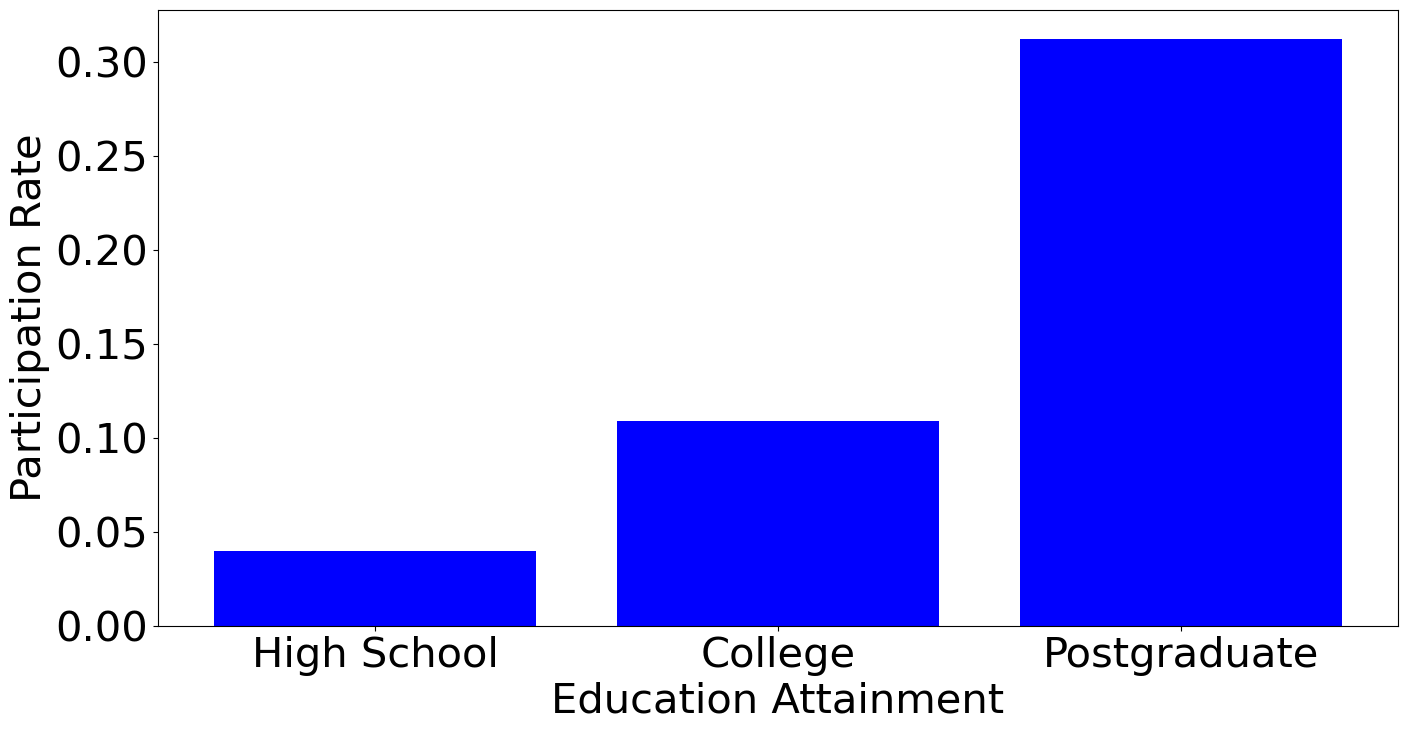

In [3]:
Fdf.loc[Fdf["education"]=="middleSchool", "education"] = "highSchool"
a = Fdf.groupby("education").participation.mean().reindex(["highSchool", "college", "postGraduate"]).values
plt.xlabel("Education Attainment")
plt.ylabel("Participation Rate")
plt.bar(x = ['High School', 'College', 'Postgraduate'], height = a, color = "blue")

<BarContainer object of 3 artists>

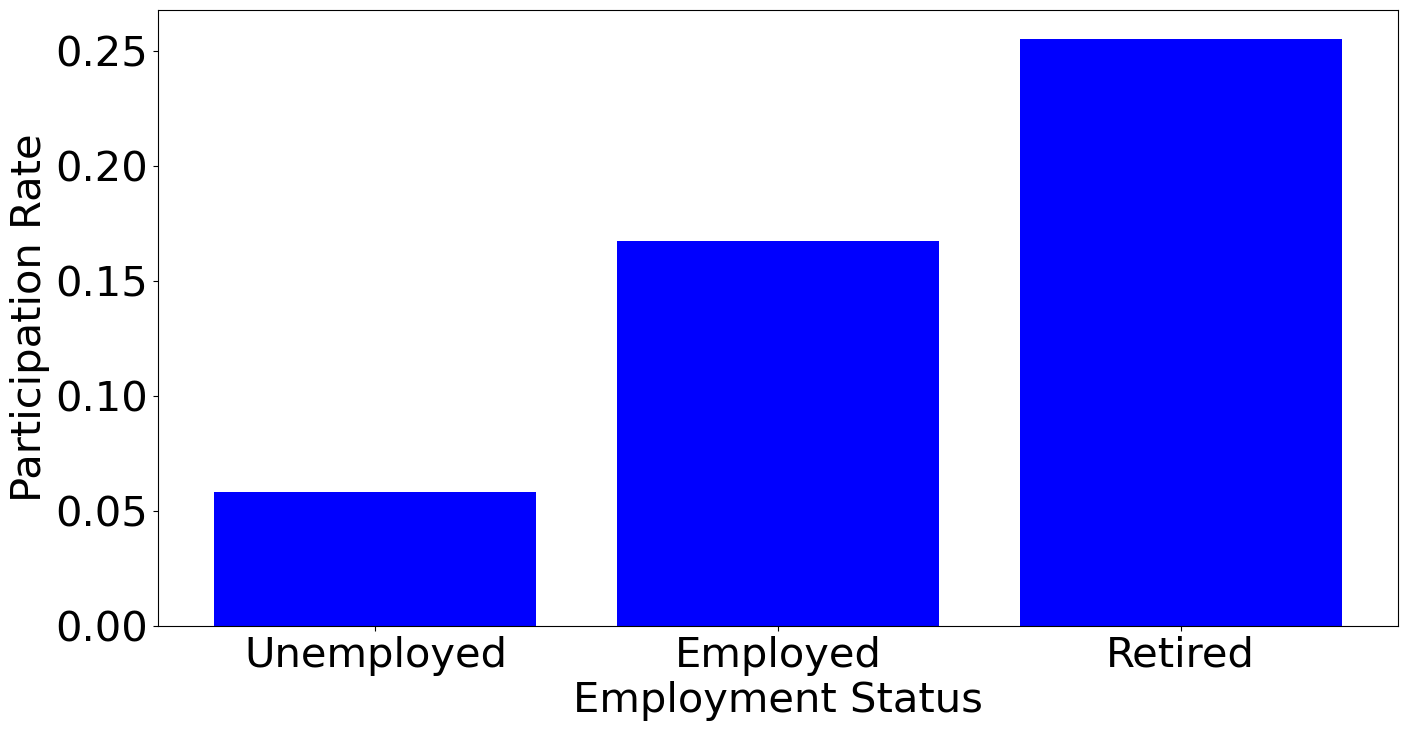

In [4]:
Fdf.loc[Fdf["employmentStatus"]=="Working", "employmentStatus"] = "Employed"
a = Fdf.groupby("employmentStatus").participation.mean().reindex(["unemployed", "employed", "retired"]).values
plt.xlabel("Employment Status")
plt.ylabel("Participation Rate")
plt.bar(x = ['Unemployed', 'Employed', 'Retired'], height = a, color = "blue")

<BarContainer object of 2 artists>

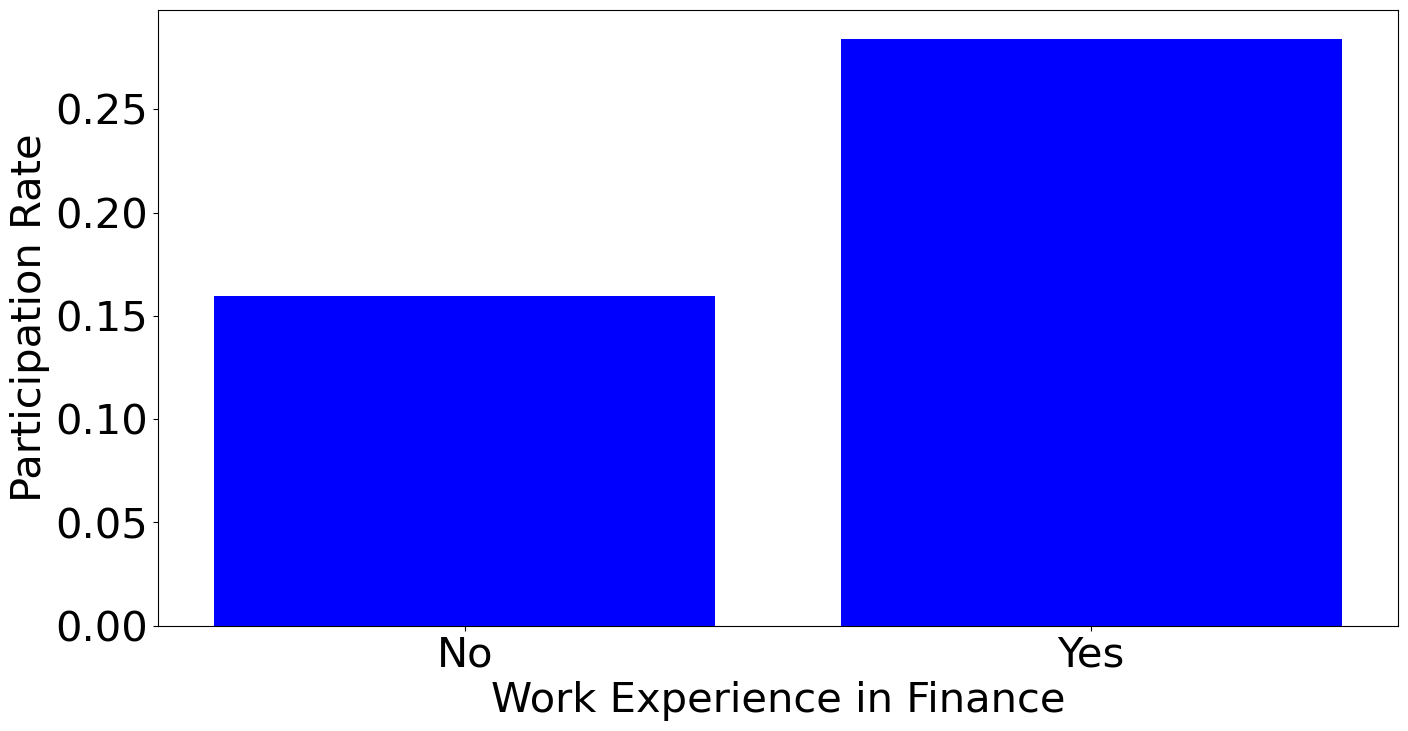

In [5]:
a = Fdf.groupby("industry").participation.mean().reindex(["noneFinance", "finance"]).values
plt.xlabel("Work Experience in Finance")
plt.ylabel("Participation Rate")
plt.bar(x = ['No', 'Yes'], height = a, color = "blue")

<BarContainer object of 3 artists>

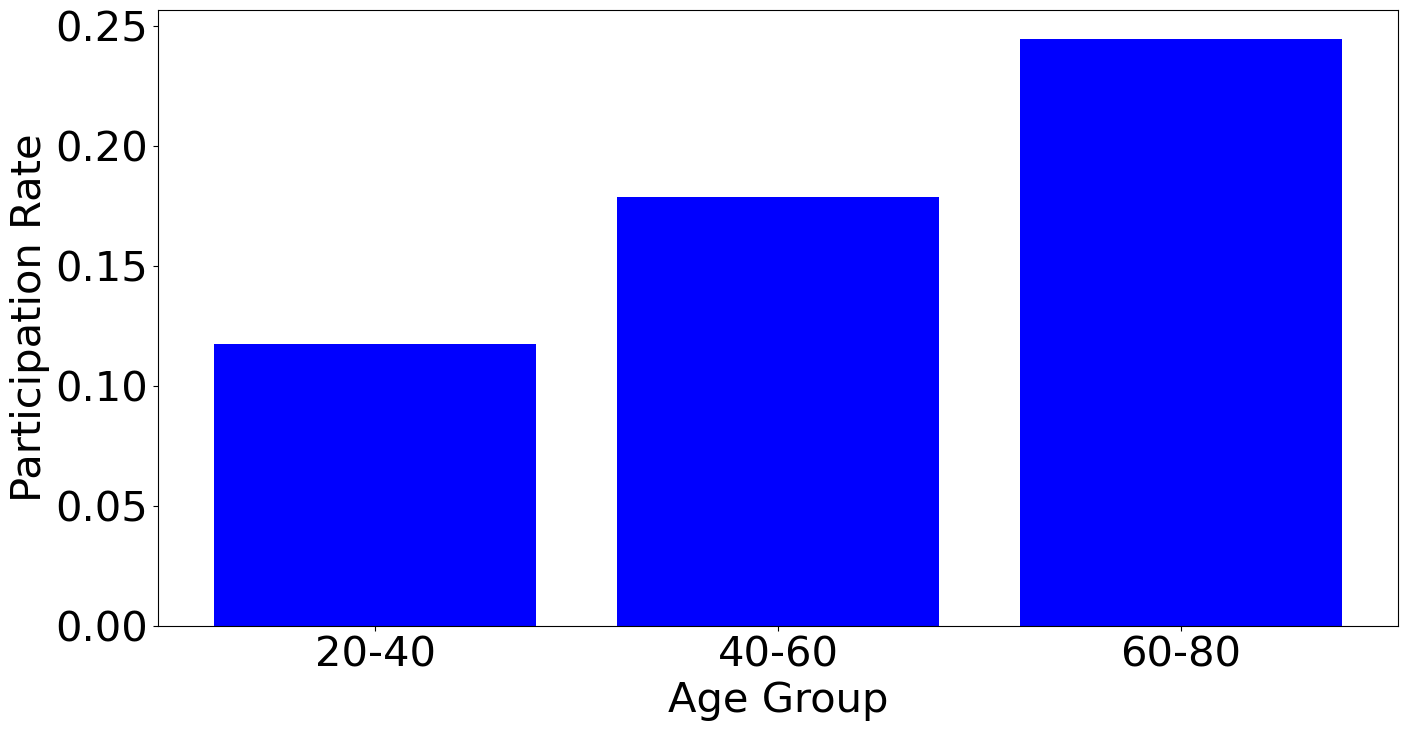

In [6]:
a = Fdf.groupby("ageGroup").participation.mean().values
plt.xlabel("Age Group")
plt.ylabel("Participation Rate")
plt.bar(x = ['20-40', '40-60', '60-80'], height = a, color = "blue")

<BarContainer object of 2 artists>

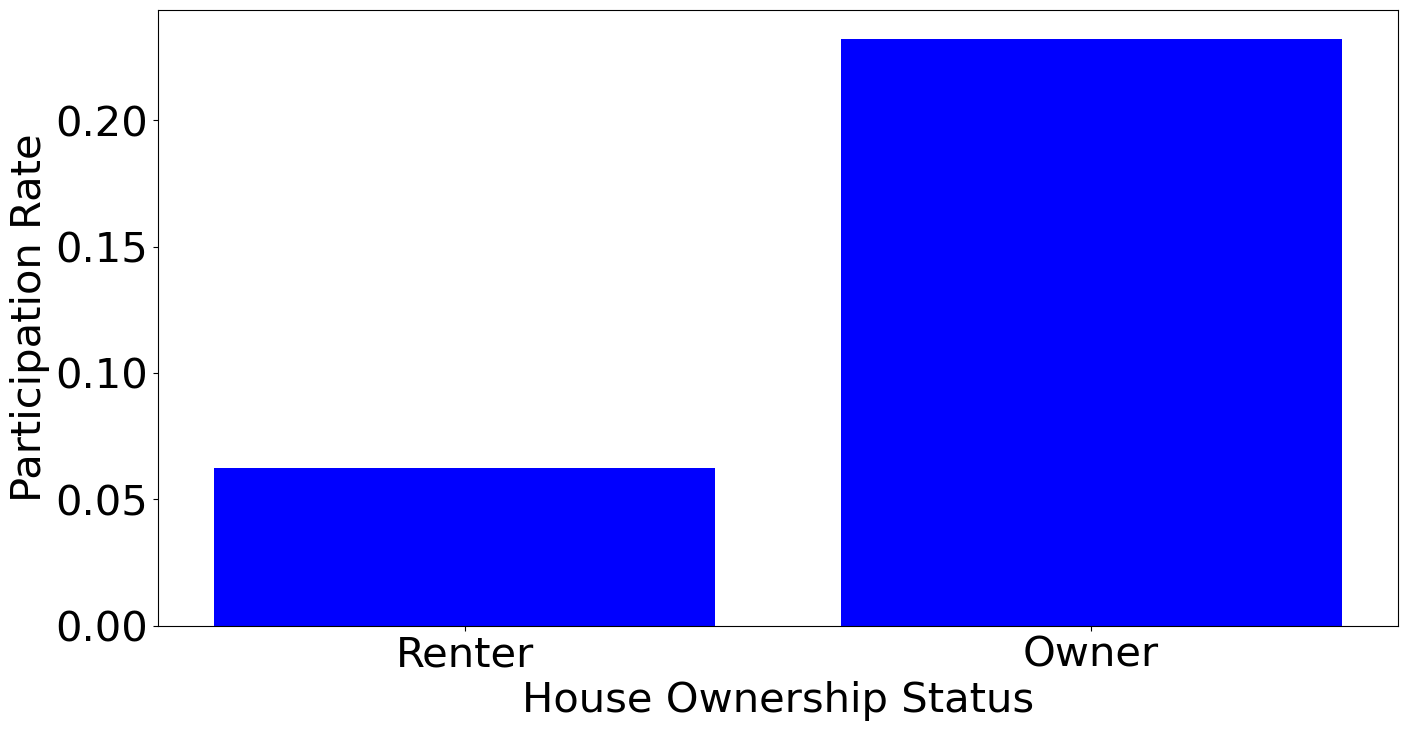

In [7]:
a = Fdf.groupby("ownership").participation.mean().reindex(["renter", "owner"]).values
plt.xlabel("House Ownership Status")
plt.ylabel("Participation Rate")
plt.bar(x = ['Renter', 'Owner'], height = a, color = "blue")

### Average Income for rich and poor agents 

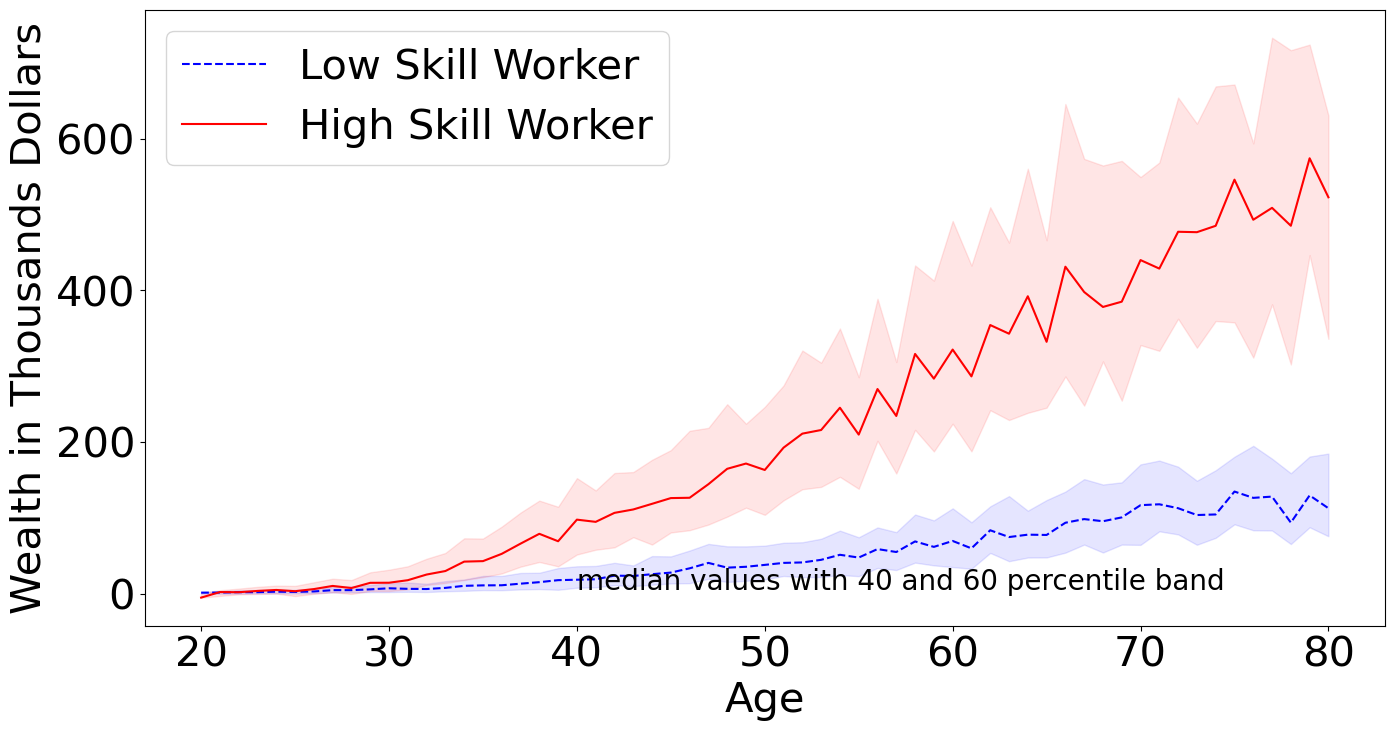

In [8]:
plt.ylabel("Wealth in Thousands Dollars")
lowEdGroup = Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['wealthWithHomeEquity'] 
lowEdGroup.median().plot(label = "Low Skill Worker", color = "blue", linestyle = "--")
plt.fill_between(list(range(20,81)), lowEdGroup.quantile(0.40), lowEdGroup.quantile(0.60), color = "blue",alpha=.1)

highEdGroup = Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['wealthWithHomeEquity']
highEdGroup.median().plot(label = "High Skill Worker", color = "red", linestyle = "-")
plt.fill_between(list(range(20,81)), highEdGroup.quantile(0.40), highEdGroup.quantile(0.60), color = "red",alpha=0.1)
plt.text(40,5,'median values with 40 and 60 percentile band', size = 20)
plt.xlabel("Age")
plt.legend()

Text(40, 5, 'median values with 40 and 60 percentile band')

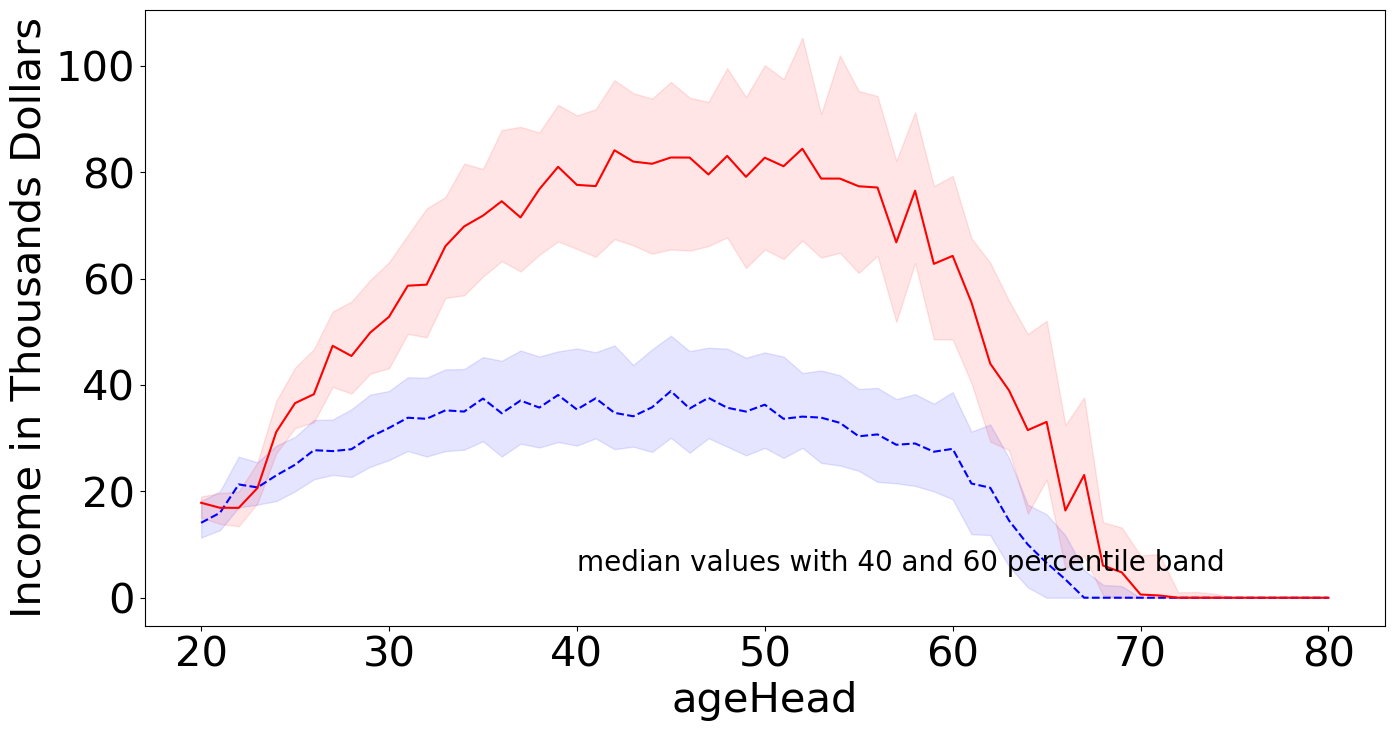

In [25]:
plt.ylabel("Income in Thousands Dollars")
lowEdGroup = Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'] 
lowEdGroup.median().plot(label = "Low Skill Worker", color = "blue", linestyle = "--")
plt.fill_between(list(range(20,81)), lowEdGroup.quantile(0.40), lowEdGroup.quantile(0.60), color = "blue",alpha=.1)

highEdGroup = Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome']
highEdGroup.median().plot(label = "High Skill Worker", color = "red")
plt.fill_between(list(range(20,81)), highEdGroup.quantile(0.40), highEdGroup.quantile(0.60), color = "red",alpha=0.1)
plt.text(40,5,'median values with 40 and 60 percentile band', size = 20)
#plt.legend(loc='upper left')

In [10]:
from scipy.signal import savgol_filter
lowIncome_mean = Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'].mean().values
highIncome_mean = Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome'].mean().values

lowIncome_median = Fdf[(Fdf.education == 'highSchool')|(Fdf.education == 'college')].groupby("ageHead")['laborIncome'].median().values
highIncome_median = Fdf[Fdf.education == 'postGraduate'].groupby("ageHead")['laborIncome'].median().values

highIncomeSmooth = savgol_filter(highIncome_mean,window_length=9,polyorder=1)
lowIncomeSmooth = savgol_filter(lowIncome_mean,window_length=9,polyorder=1)
ages = list(range(20,81))

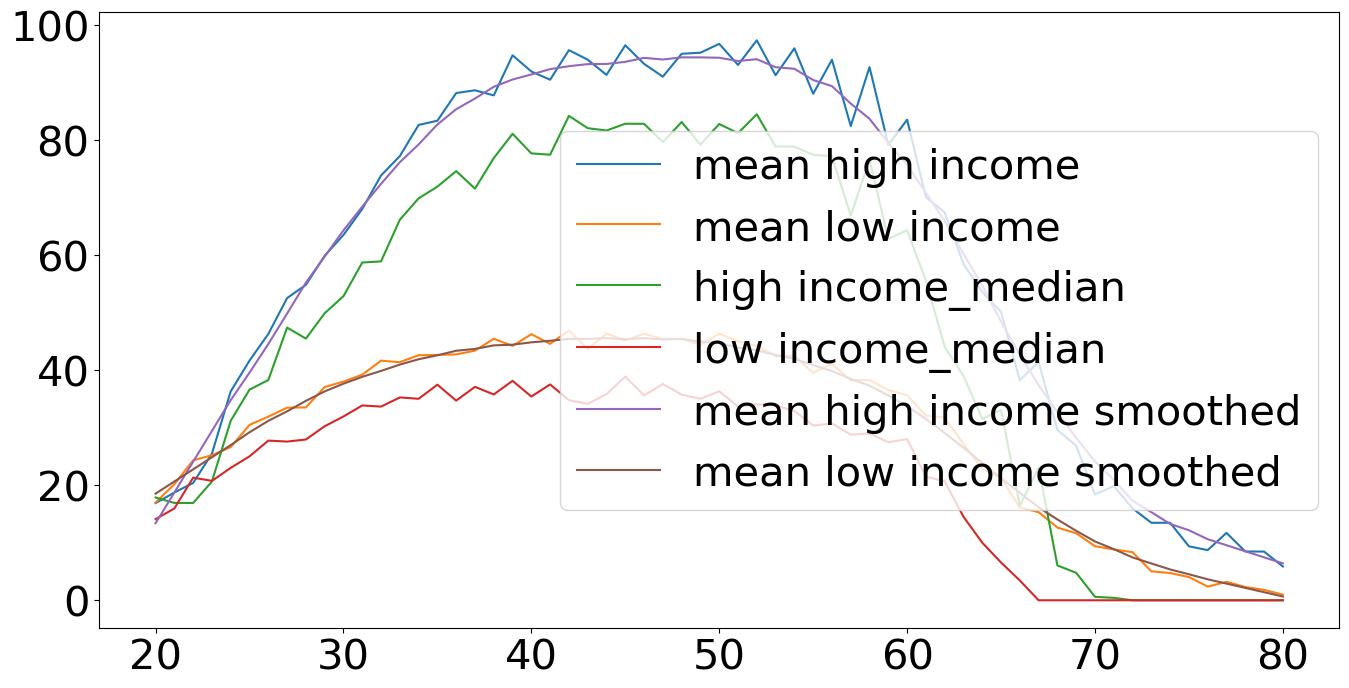

In [11]:
plt.plot(ages, highIncome_mean, label = "mean high income")
plt.plot(ages, lowIncome_mean, label = "mean low income")
plt.plot(ages, highIncome_median, label = "high income_median")
plt.plot(ages, lowIncome_median, label = "low income_median")
plt.plot(ages, highIncomeSmooth, label = "mean high income smoothed")
plt.plot(ages, lowIncomeSmooth, label = "mean low income smoothed")
plt.legend()

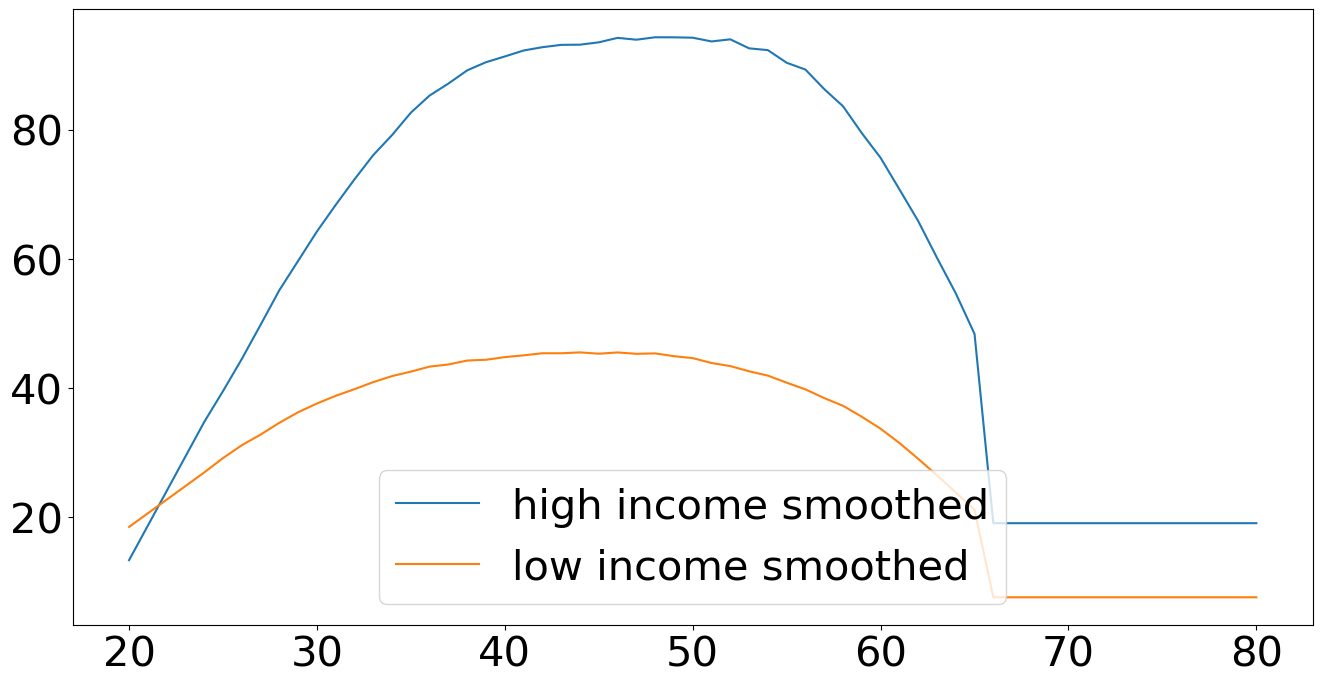

In [12]:
highIncomeSmooth[46:] = np.mean(highIncomeSmooth[46:])
lowIncomeSmooth[46:] = np.mean(lowIncomeSmooth[46:])
plt.plot(ages, highIncomeSmooth, label = "high income smoothed")
plt.plot(ages, lowIncomeSmooth, label = "low income smoothed")
plt.legend()

In [13]:
highIncomeSmooth

array([13.37849579, 18.72595173, 24.07340767, 29.42086361, 34.76831955,
       39.54163551, 44.51306305, 49.79998486, 55.164864  , 59.70479586,
       64.25238847, 68.36753109, 72.32427712, 76.07879845, 79.17340348,
       82.64031977, 85.29410514, 87.14237353, 89.18661906, 90.44546828,
       91.33075851, 92.25294797, 92.76311693, 93.12507862, 93.15385616,
       93.51619373, 94.20868926, 93.92360988, 94.29848755, 94.2909543 ,
       94.23216993, 93.65469847, 93.98051629, 92.58719735, 92.30867529,
       90.3566648 , 89.30021911, 86.27355646, 83.62504444, 79.46396248,
       75.63723767, 70.77055698, 65.86174001, 60.17673265, 54.67652659,
       48.38547057, 19.09723848, 19.09723848, 19.09723848, 19.09723848,
       19.09723848, 19.09723848, 19.09723848, 19.09723848, 19.09723848,
       19.09723848, 19.09723848, 19.09723848, 19.09723848, 19.09723848,
       19.09723848])

In [14]:
lowIncomeSmooth

array([18.52450172, 20.63137728, 22.73825285, 24.84512842, 26.95200399,
       29.18132081, 31.16179354, 32.8150436 , 34.63922158, 36.27658238,
       37.62113776, 38.81209043, 39.84020501, 40.93563765, 41.86623916,
       42.55475938, 43.33589551, 43.66047472, 44.27228605, 44.39225695,
       44.80173256, 45.07201521, 45.39861648, 45.39457498, 45.53156148,
       45.32595159, 45.52129646, 45.31114864, 45.373943  , 44.94413169,
       44.64304047, 43.89029198, 43.40944453, 42.60894212, 41.93145044,
       40.84403453, 39.80539228, 38.45687591, 37.26967232, 35.56824611,
       33.71579233, 31.51489444, 29.05899955, 26.50777094, 23.85424754,
       21.19027804,  7.63103118,  7.63103118,  7.63103118,  7.63103118,
        7.63103118,  7.63103118,  7.63103118,  7.63103118,  7.63103118,
        7.63103118,  7.63103118,  7.63103118,  7.63103118,  7.63103118,
        7.63103118])

In [15]:
np.save("../constant/highIncomeDetermined", highIncomeSmooth)
np.save("../constant/lowIncomeDetermined", lowIncomeSmooth)

 ### More summary plots

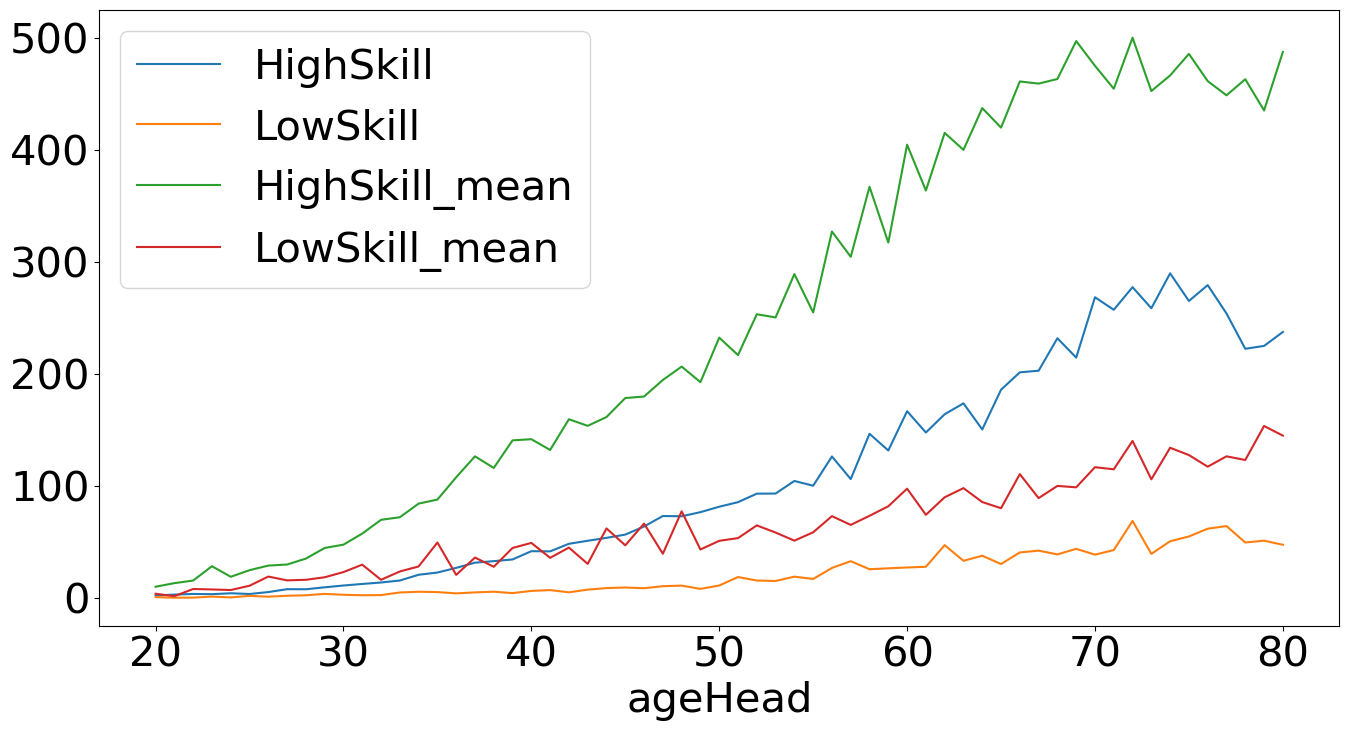

In [16]:
Fdf[Fdf.skillLevel == 'High'].groupby("ageHead")['wealthWithHomeEquity'].median().plot(label = "HighSkill")
Fdf[Fdf.skillLevel == 'Low'].groupby("ageHead")['wealthWithHomeEquity'].median().plot(label = "LowSkill")
Fdf[Fdf.skillLevel == 'High'].groupby("ageHead")['wealthWithHomeEquity'].mean().plot(label = "HighSkill_mean")
Fdf[Fdf.skillLevel == 'Low'].groupby("ageHead")['wealthWithHomeEquity'].mean().plot(label = "LowSkill_mean")
plt.legend()

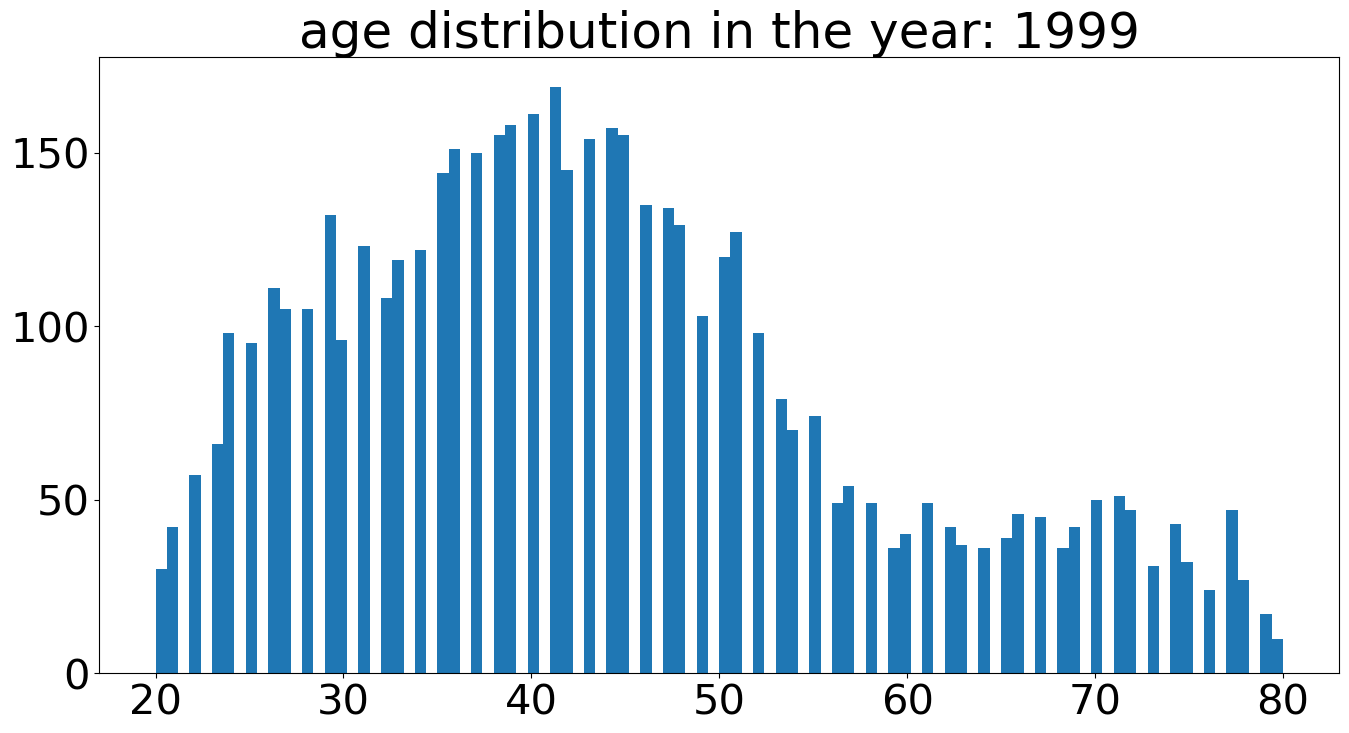

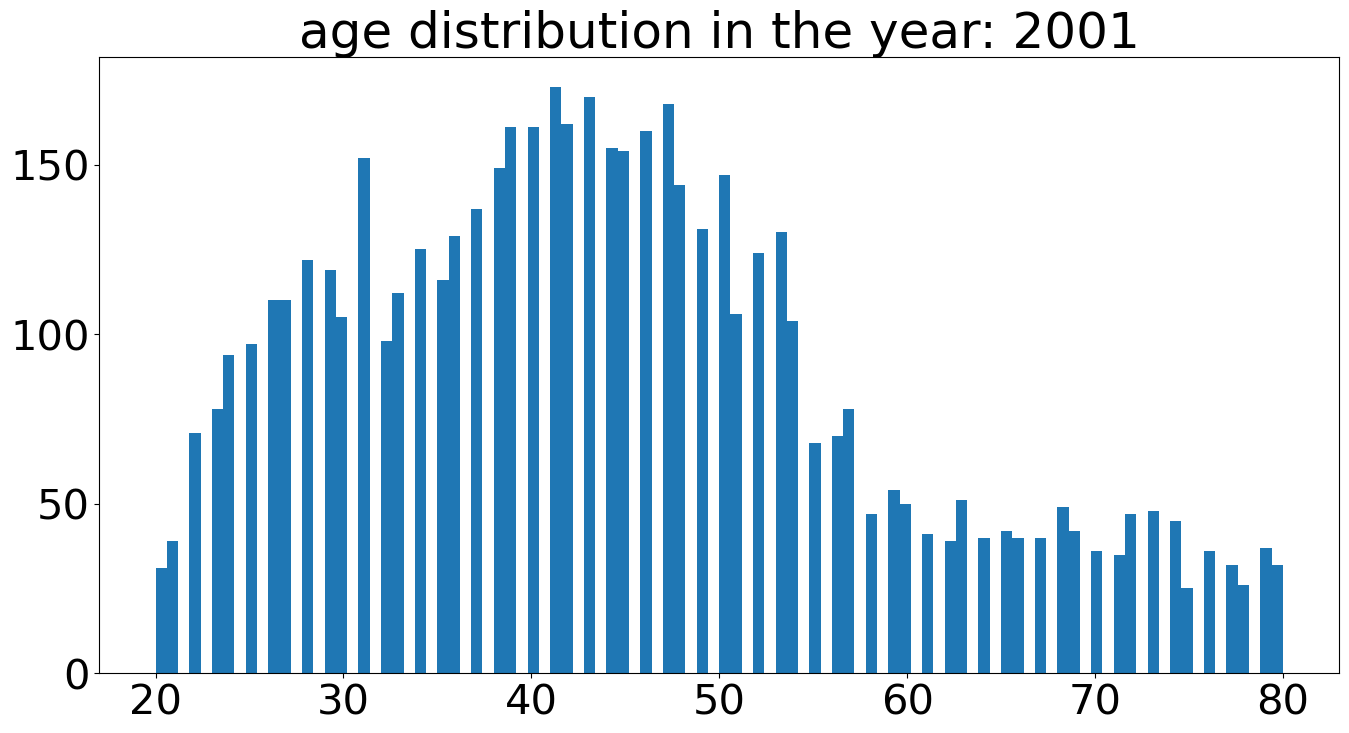

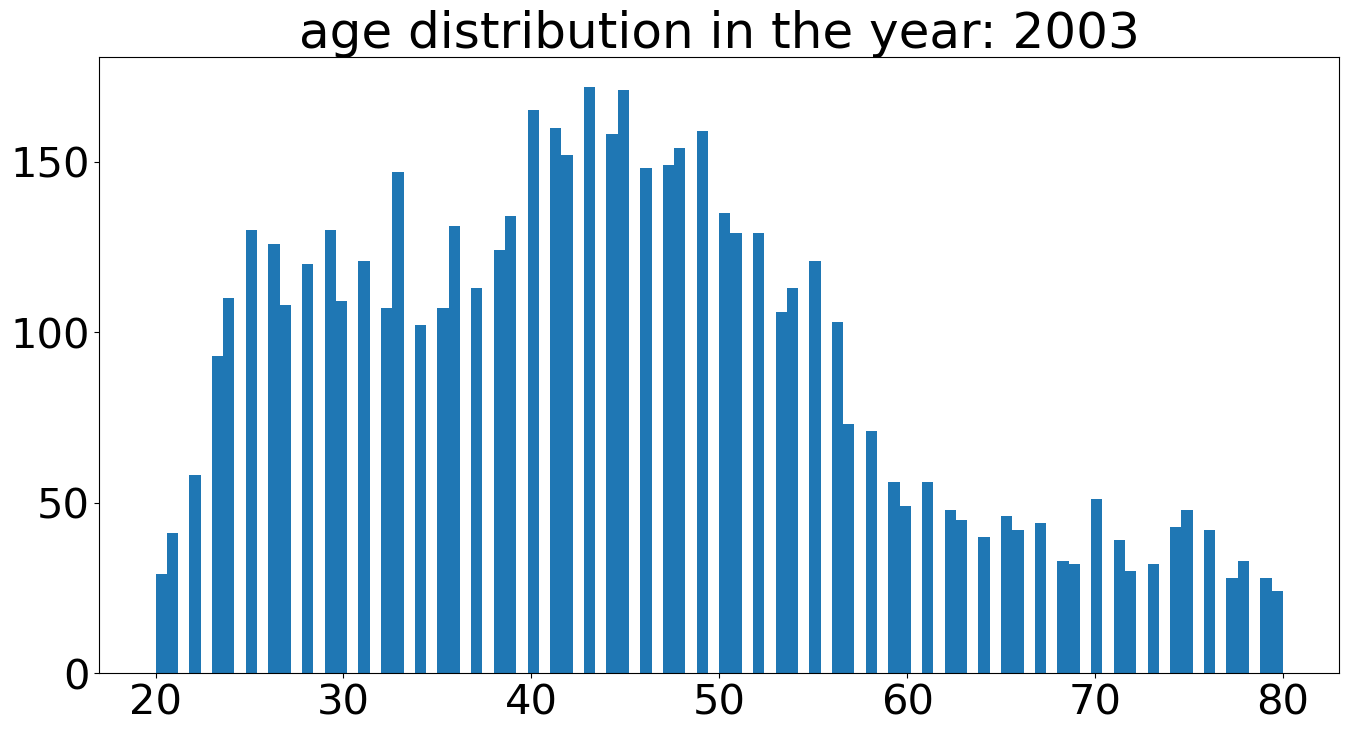

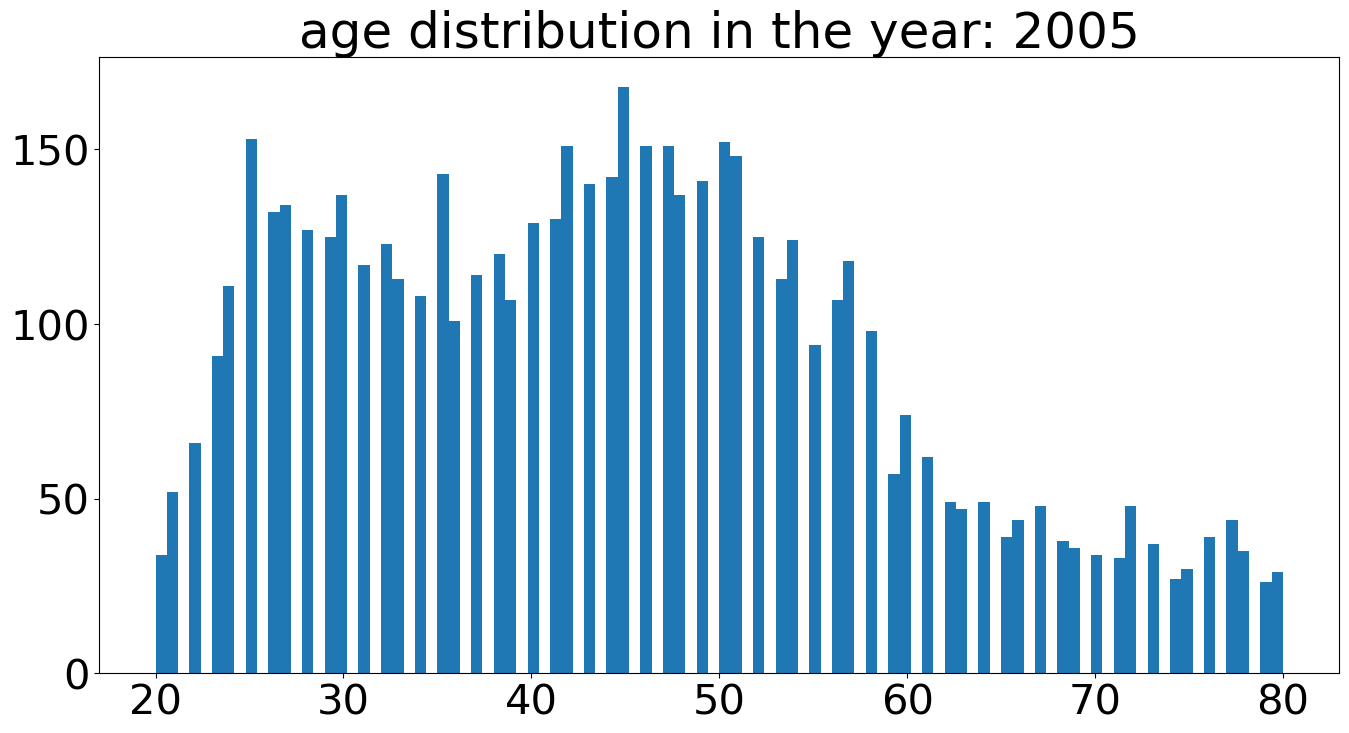

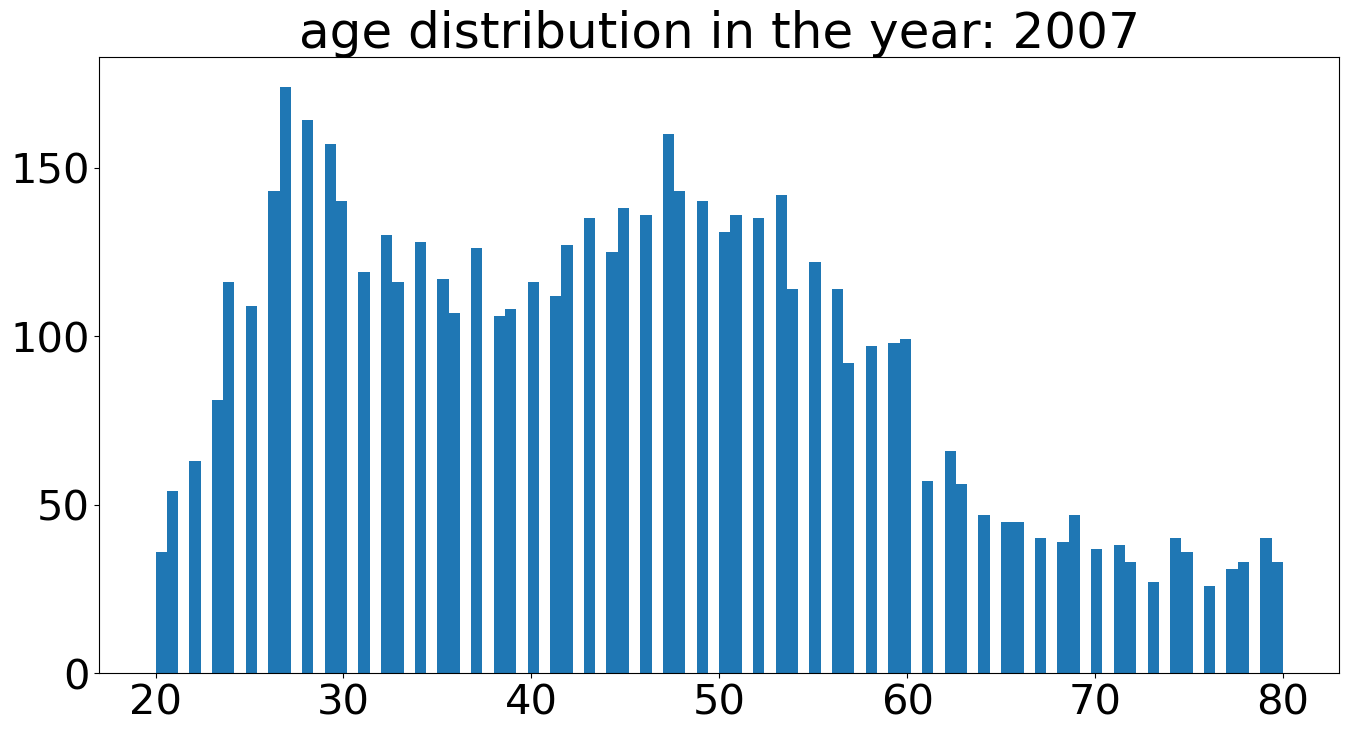

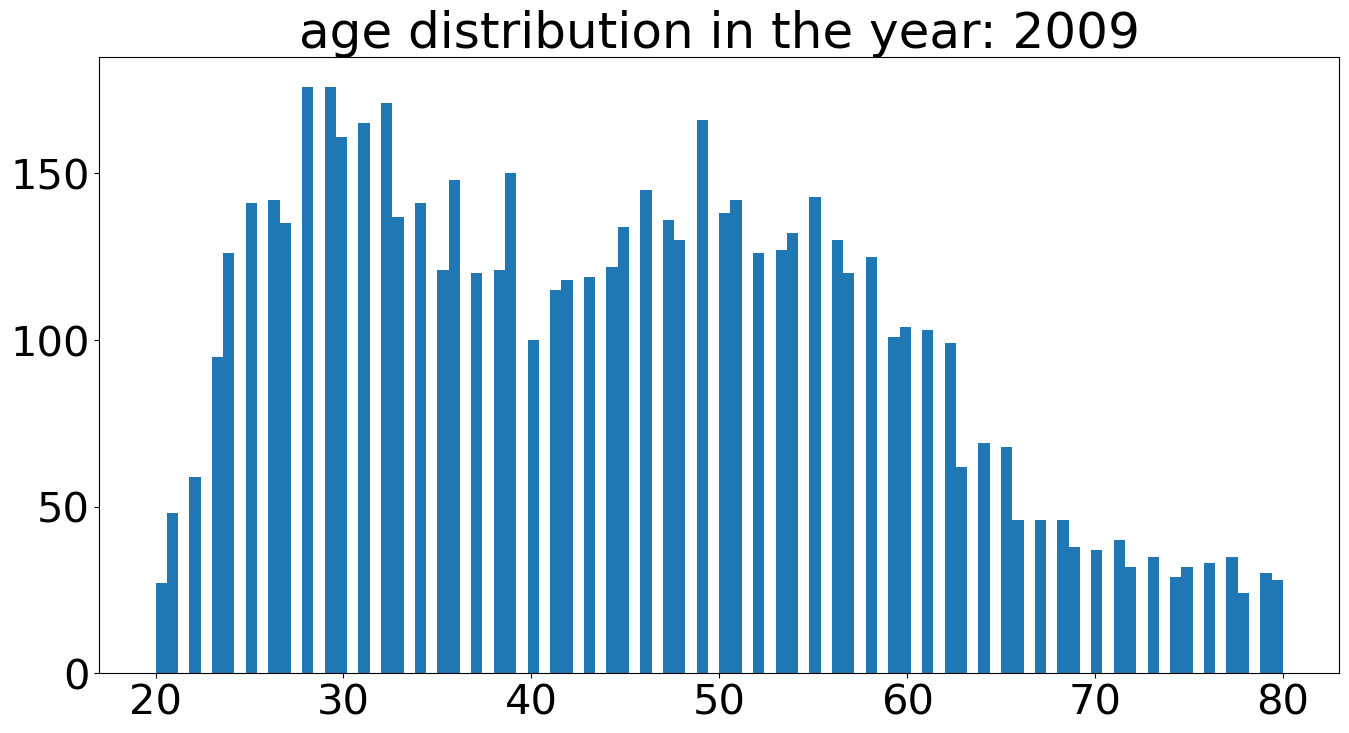

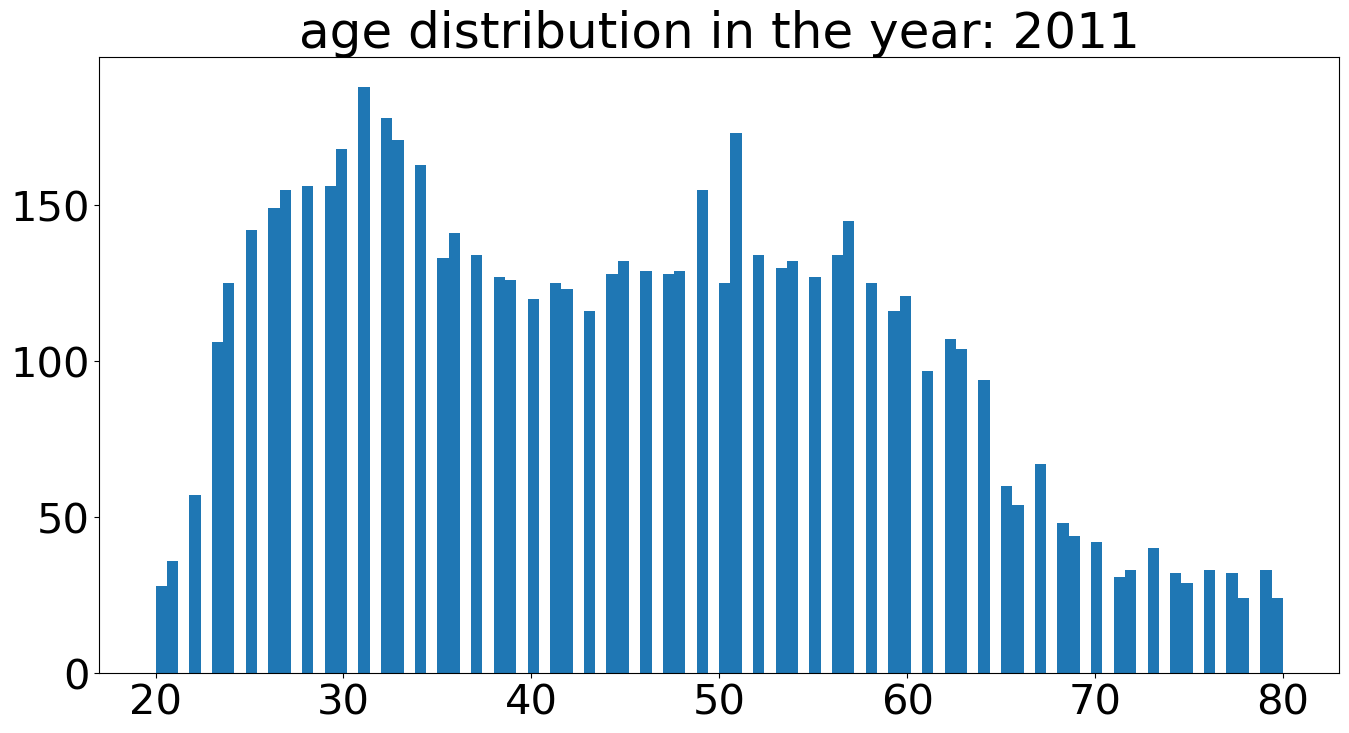

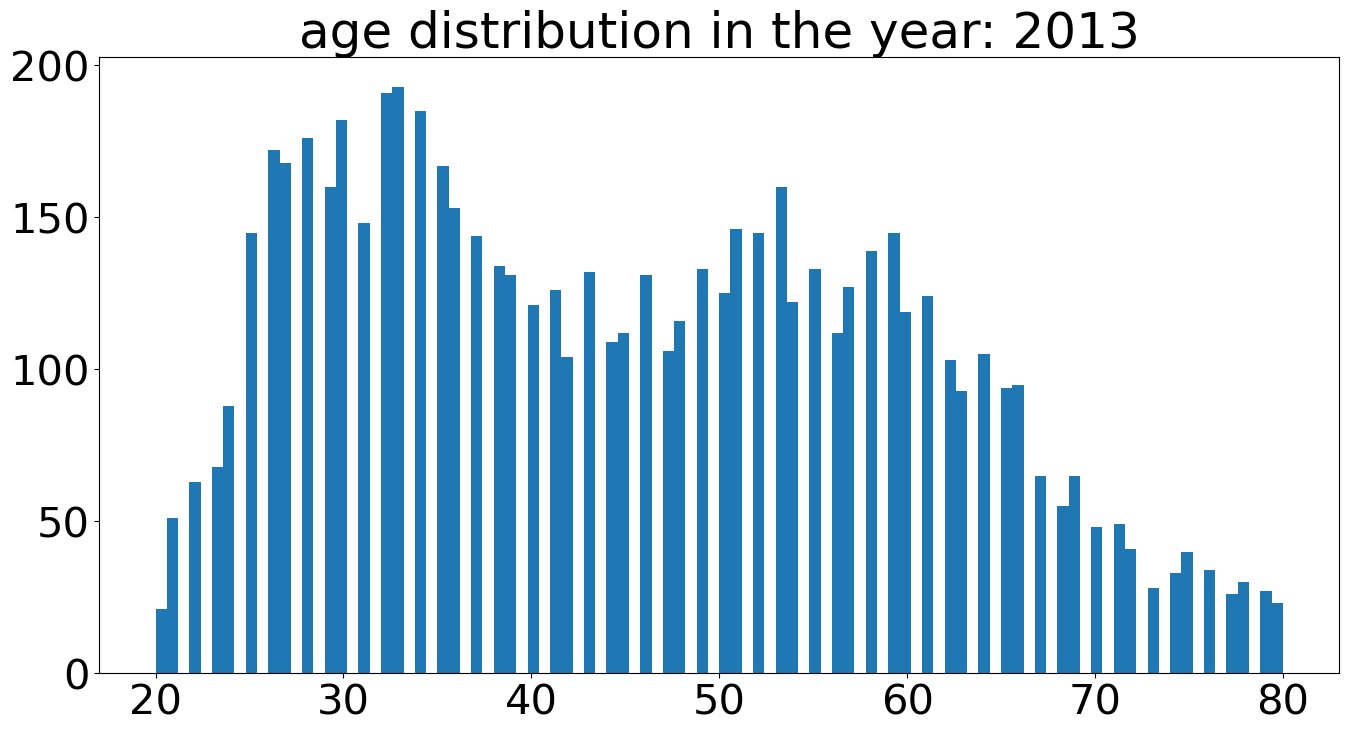

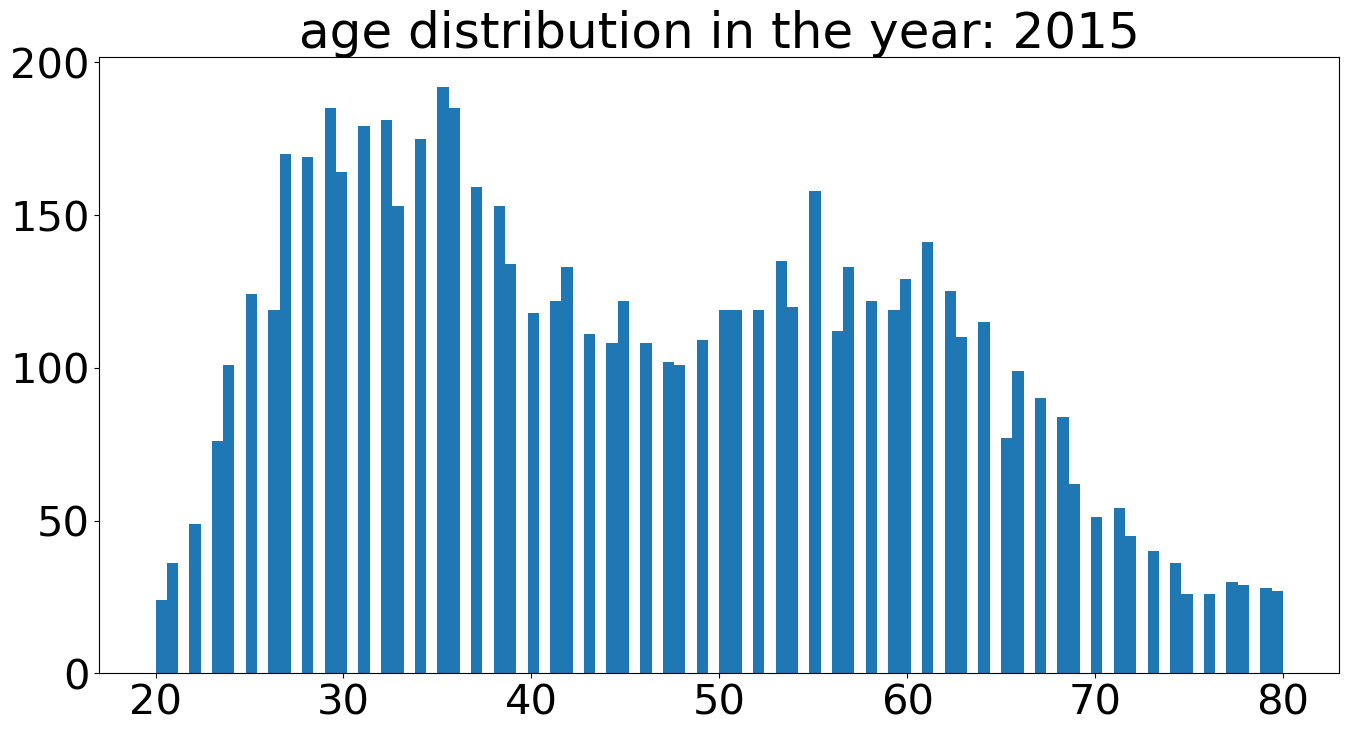

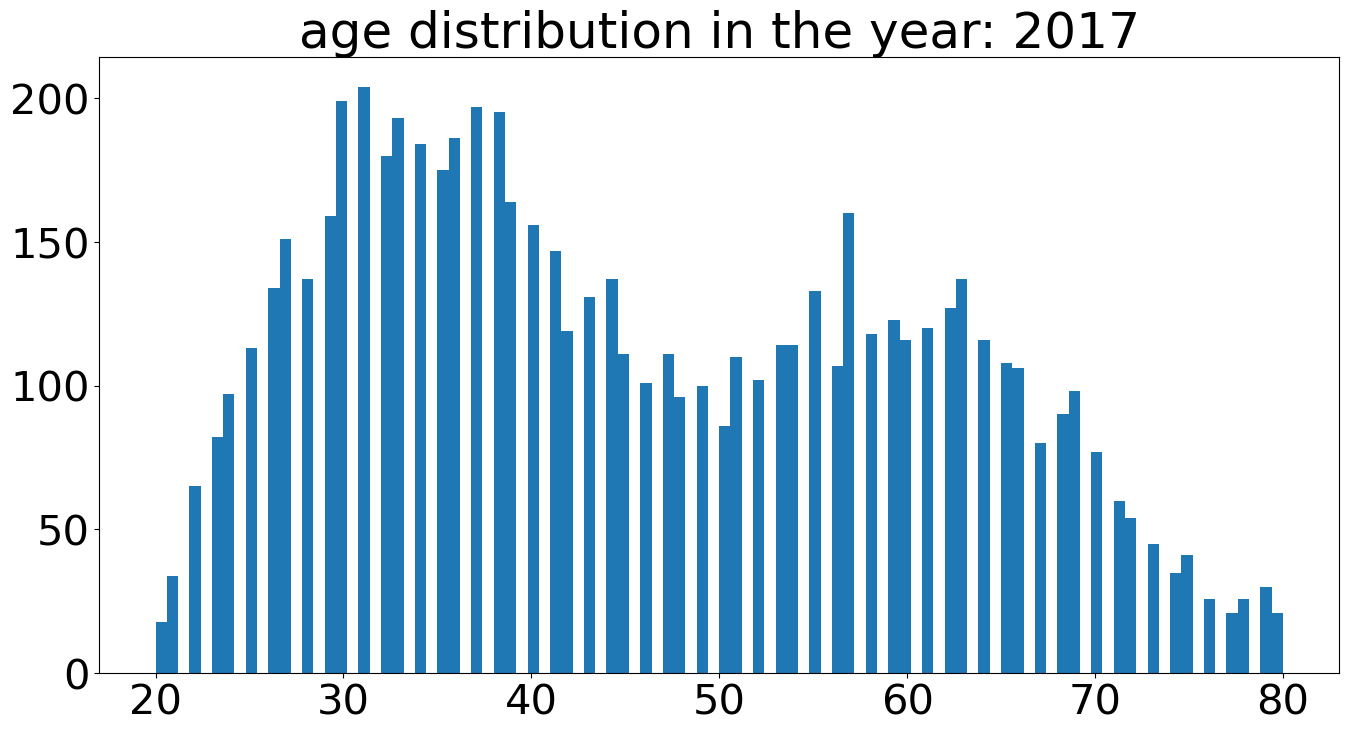

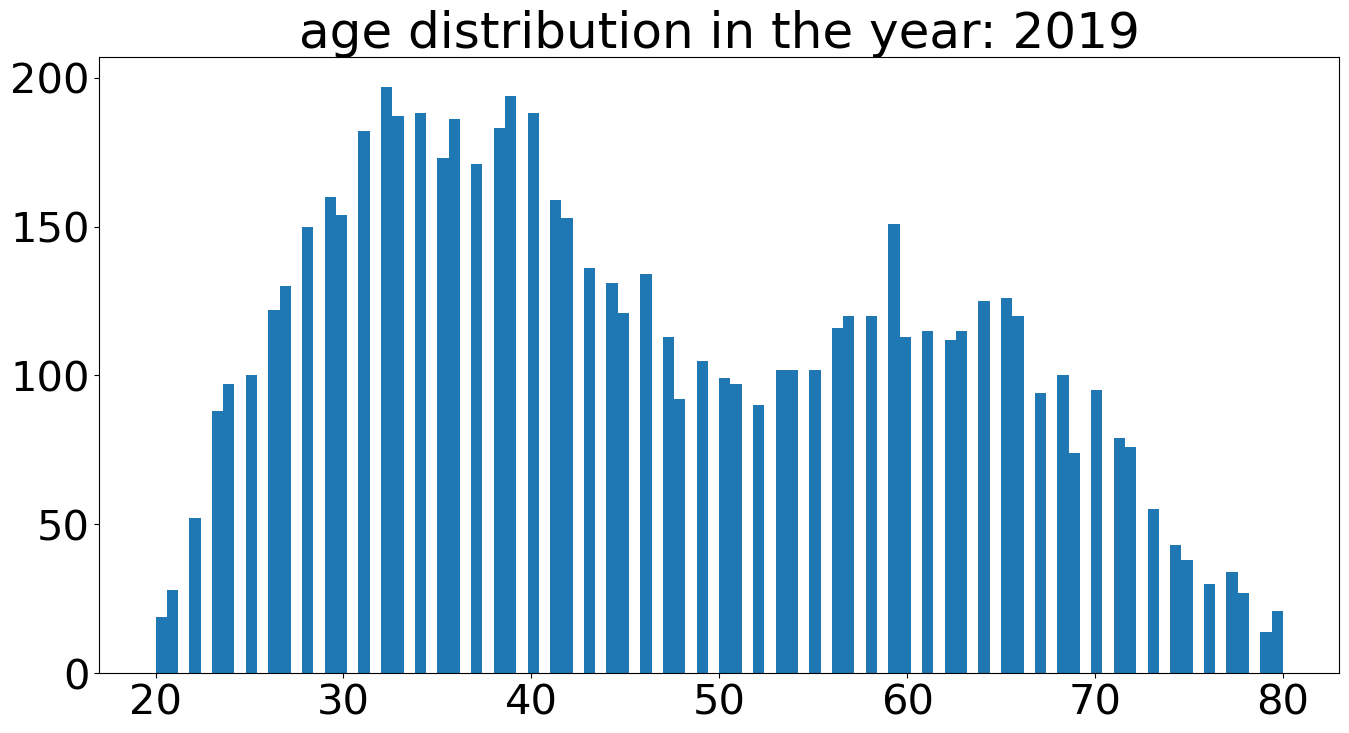

In [17]:
years = list(range(1999,2020,2))
# age distribution seems stable
for year in years:
    plt.figure()
    plt.title("age distribution in the year: " + str(year))
    plt.hist(Fdf[Fdf["year"] == year].ageHead, bins = 100)

### 4 types of agents ratios in the population

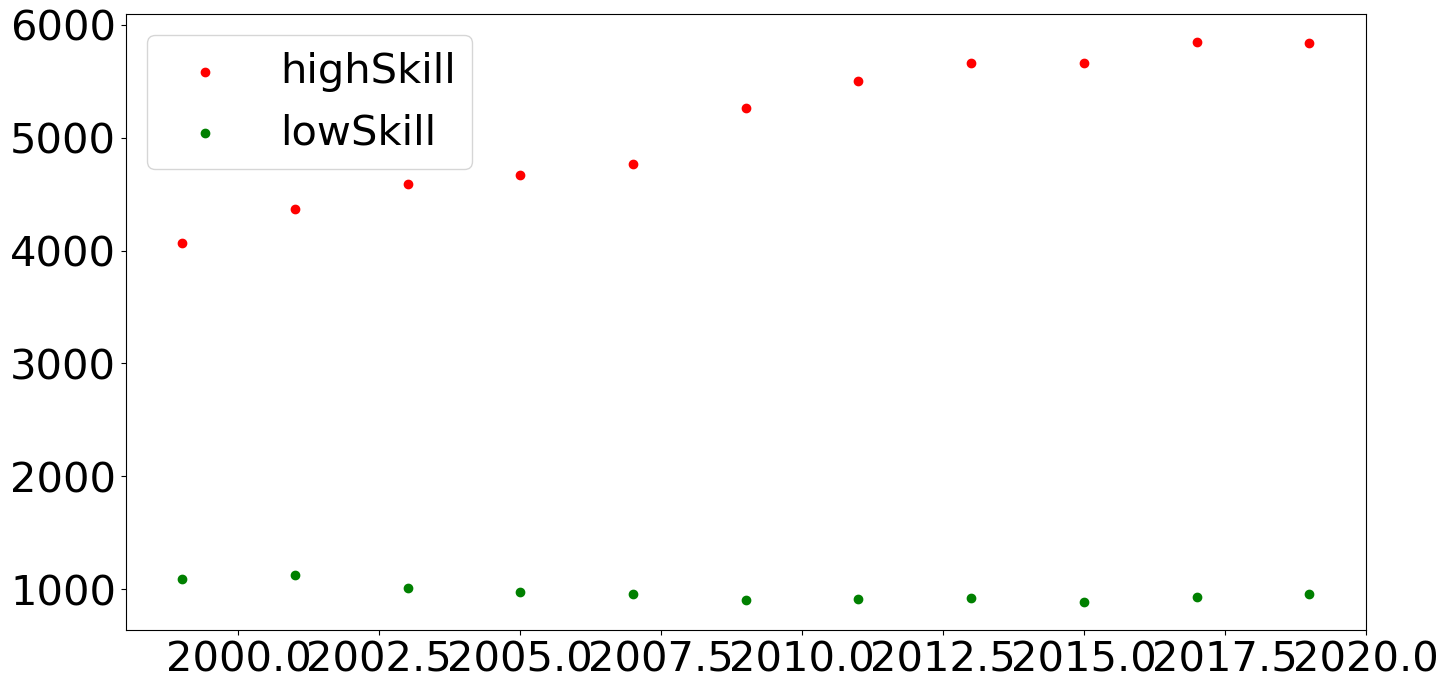

In [18]:
for year in years:
    highSkill = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "High")].shape[0], color = 'r')
    lowSkill = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "Low")].shape[0], color = 'g')
plt.legend((highSkill,lowSkill), ("highSkill", "lowSkill"))

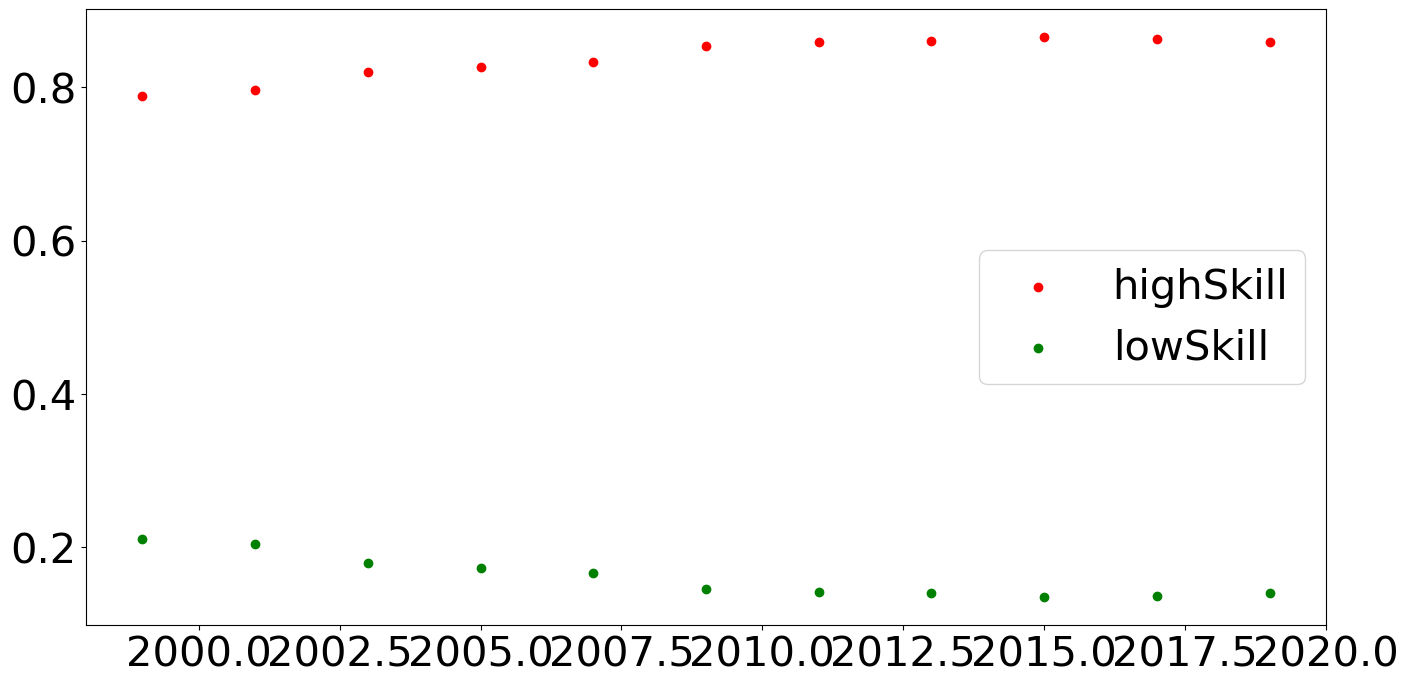

In [19]:
highSkillRatios = []
lowSkillRatios = []
for year in years:
    highRatio = Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    lowRatio = Fdf[(Fdf["year"] == year)&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    highSkillRatios.append(highRatio)
    lowSkillRatios.append(lowRatio)
    highSkill = plt.scatter(year, highRatio, color = 'r')
    lowSkill = plt.scatter(year, lowRatio, color = 'g')
plt.legend((highSkill,lowSkill), ("highSkill", "lowSkill"))

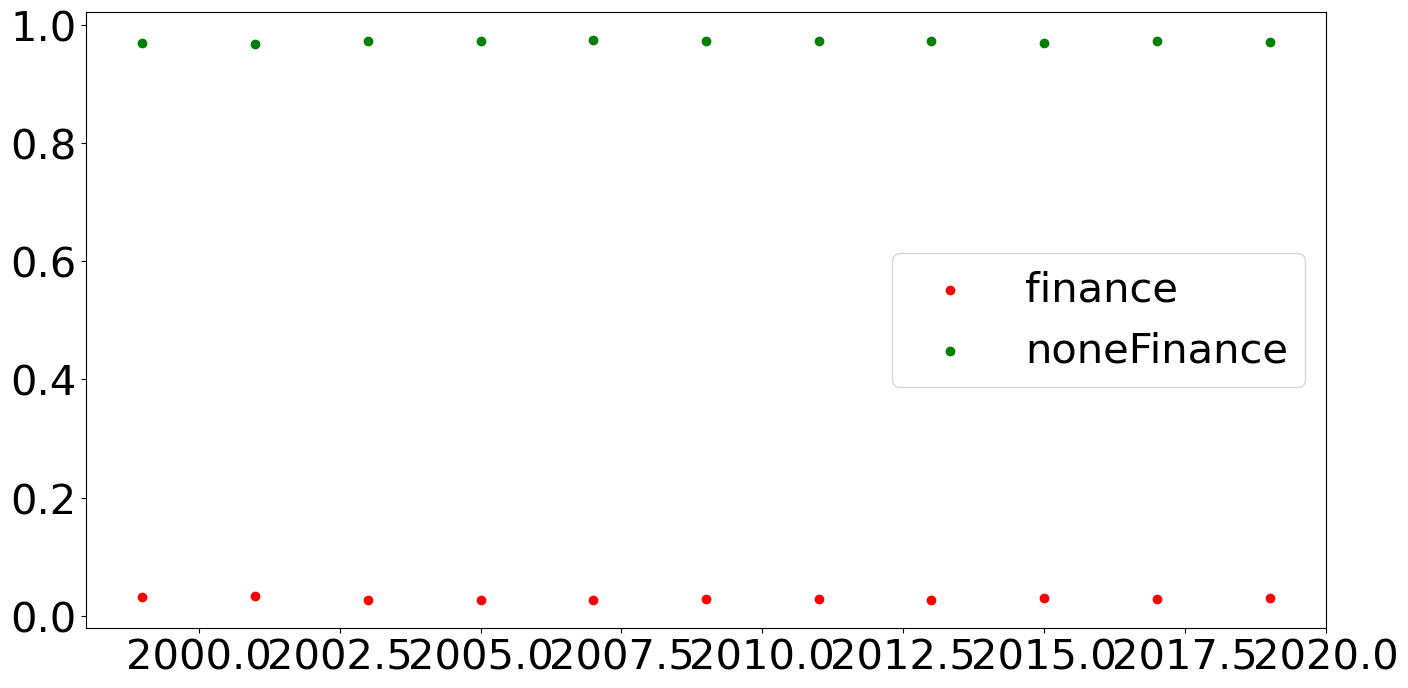

In [20]:
financeRatios = []
noneFinanceRatios= []
for year in years:
    fRatio = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    nfRatio =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    financeRatios.append(fRatio)
    noneFinanceRatios.append(nfRatio)
    finance = plt.scatter(year, fRatio, color = 'r')
    noneFinance = plt.scatter(year, nfRatio, color = 'g')
plt.legend((finance,noneFinance), ("finance", "noneFinance"))

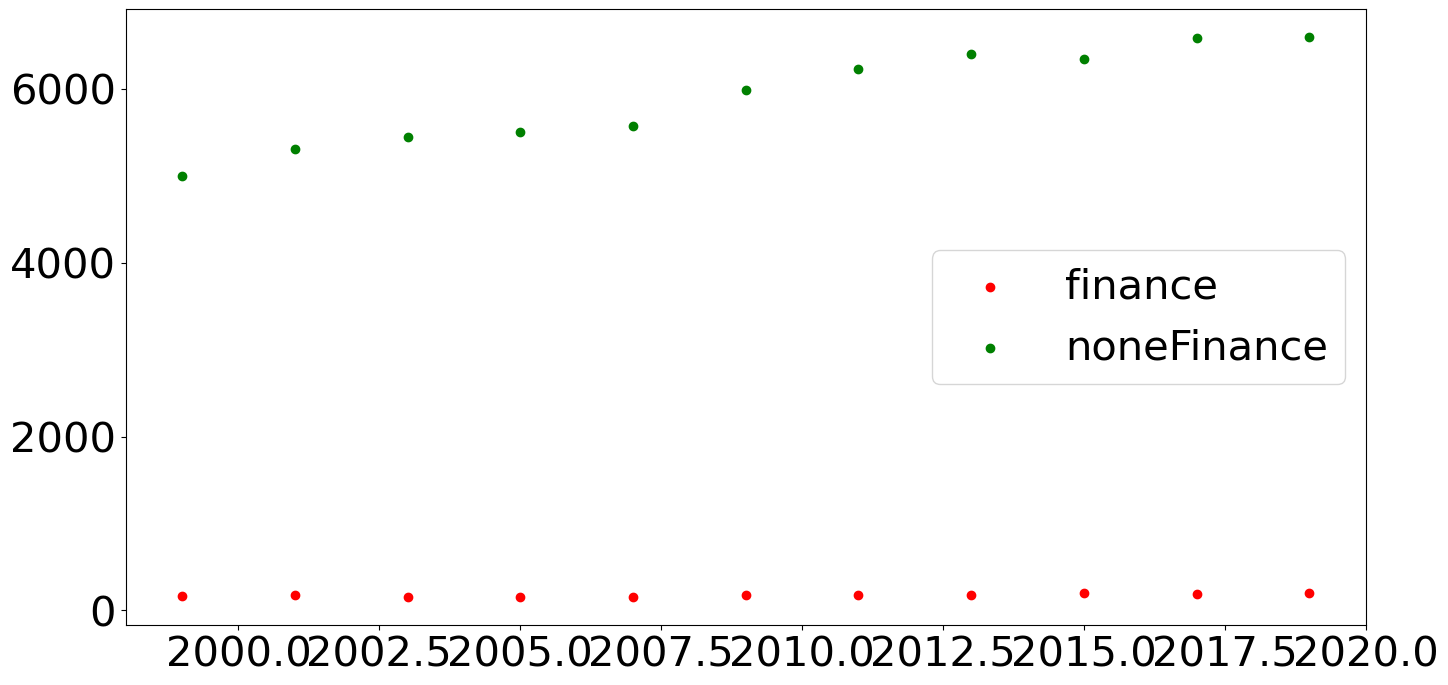

In [21]:
for year in years:
    finance = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")].shape[0], color = 'r')
    nonFinance = plt.scatter(year, Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")].shape[0], color = 'g')
plt.legend((finance,noneFinance), ("finance", "noneFinance"))

### empirical classes (richHigh, richLow, poorHigh, poorLow)

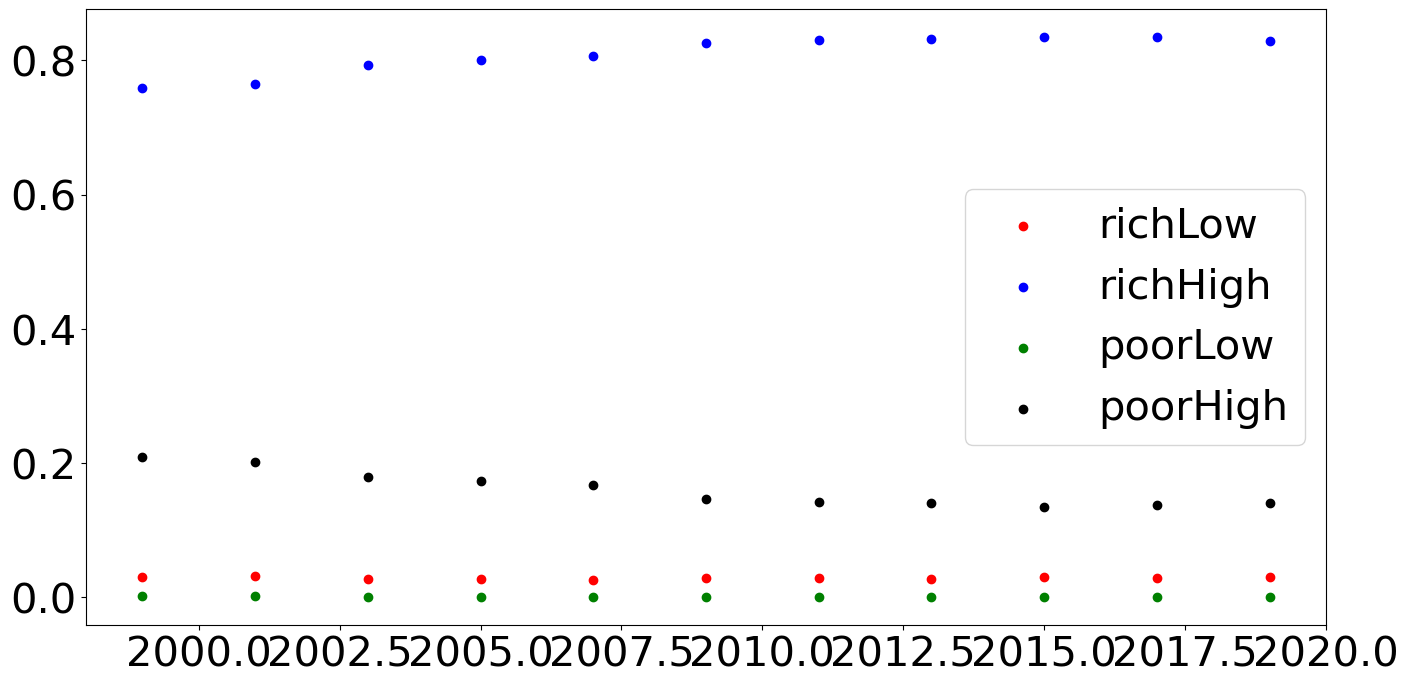

In [22]:
richHighRatios = []
richLowRatios = []
poorHighRatios = []
poorLowRatios = []
for year in years:
    richLow = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    richHigh =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")&(Fdf["skillLevel"] == "High")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    poorLow = Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "Yes")&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]
    poorHigh =  Fdf[(Fdf["year"] == year)&(Fdf["financeExperience"] == "No")&(Fdf["skillLevel"] == "Low")].shape[0]/Fdf[(Fdf["year"] == year)].shape[0]   
    richHighRatios.append(richHigh)
    richLowRatios.append(richLow)
    poorHighRatios.append(poorHigh)
    poorLowRatios.append(poorLow)
    rl = plt.scatter(year, richLow, color = "r")
    rh = plt.scatter(year, richHigh, color = "b")
    pl = plt.scatter(year, poorLow, color = "g")
    ph = plt.scatter(year, poorHigh, color = "k")
plt.legend((rl,rh,pl,ph), ("richLow", "richHigh", "poorLow", "poorHigh"))